#### Import Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

##### Task #1 : Merging 12 months of sales data into a single file

In [4]:
all_months_data = pd.DataFrame()

files = [file for file in os.listdir("./Sales_Data")]

for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data,df])

all_months_data.to_csv("all_data.csv", index = False)
    

#### Read in updated DataFrame

In [6]:
all_data = pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [7]:
all_data.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
186849,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


#### Clean up Data

##### The first step in this is figuring out what we need to clean. I have found in practice, that you find things you need to clean as you perform operations and get errors. Based on the error, you decide how you should go about cleaning the data

##### Drop rows of NAN

In [11]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
all_data = all_data.dropna(how = 'all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


##### Find 'or' and delete it.

In [14]:
all_data[all_data['Order Date'].str[0:2] == 'Or']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


##### Get rid of text in order date column

In [16]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

##### Make columns correct type

In [18]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [19]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

#### Augment data with additional columns

##### Add month column

In [22]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


##### Add month column (alternative method)

In [24]:
all_data['Month_2'] = pd.to_datetime(all_data['Order Date']).dt.month
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month_2
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,4


##### Add city column

In [26]:
# Let's use .apply method :
    
all_data['City']=all_data['Purchase Address'].apply(lambda x: x.split(',')[1])
all_data['City'].head()

all_data.drop(columns = 'City',inplace = True)

In [27]:
def get_city(address):
    return address.split(',')[1].strip(" ")


def get_state(address):
    return address.split(',')[2].split(' ')[1]


all_data['City']=all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month_2,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,4,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,4,Los Angeles (CA)


#### Add Sales Column

In [29]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month_2,City,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4,Dallas (TX),23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,4,Boston (MA),99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,Los Angeles (CA),600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,Los Angeles (CA),11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,4,Los Angeles (CA),11.99


### Data Exploration!

##### Question 1: What was the best month for sales? How much was earned that month?

In [32]:
all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')

In [33]:
results = all_data.groupby(['Month'])['Sales'].sum()

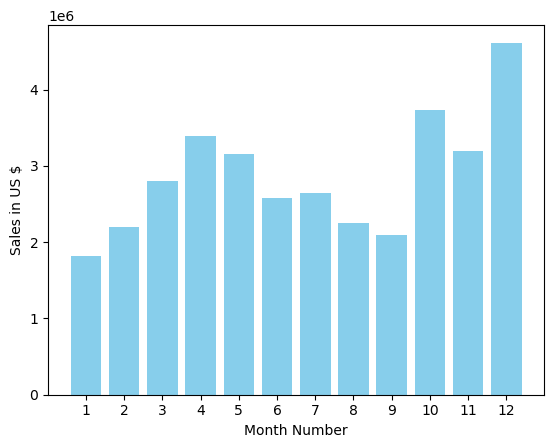

In [34]:
months = range(1,13)

plt.bar(months,results, color = 'skyblue')
plt.xticks(months)
plt.ylabel('Sales in US $')
plt.xlabel('Month Number')
plt.show()

##### Question 2: What city sold the most product?

In [36]:
results = all_data.groupby(['City'])['Sales'].sum()
results

City
Atlanta (GA)          2795498.58
Austin (TX)           1819581.75
Boston (MA)           3661642.01
Dallas (TX)           2767975.40
Los Angeles (CA)      5452570.80
New York City (NY)    4664317.43
Portland (ME)          449758.27
Portland (OR)         1870732.34
San Francisco (CA)    8262203.91
Seattle (WA)          2747755.48
Name: Sales, dtype: float64

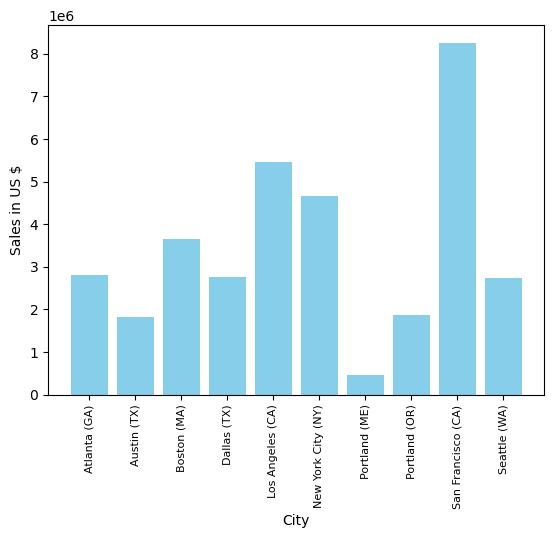

In [37]:
city = [city for city,df in all_data.groupby('City')]


plt.bar(city,results, color = 'skyblue')
plt.xticks(city,rotation="vertical",size = 8)
plt.ylabel('Sales in US $')
plt.xlabel('City')
plt.show()

##### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [39]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [40]:
# Add hour,minute,count column
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count'] = 1
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month_2,City,Sales,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,4,Dallas (TX),23.90,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,4,Boston (MA),99.99,22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,4,Los Angeles (CA),600.00,14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,4,Los Angeles (CA),11.99,14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,4,Los Angeles (CA),11.99,9,27,1


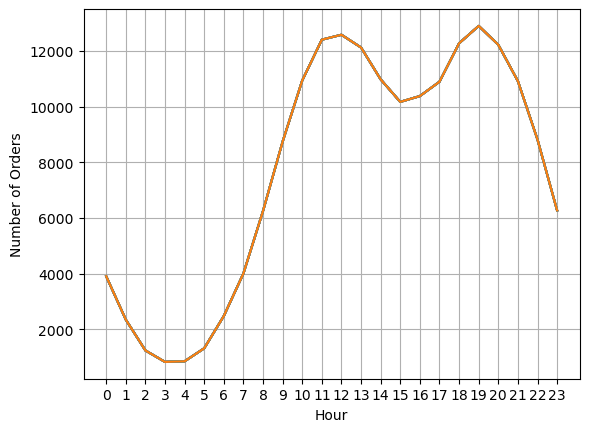

In [41]:
hours = [hour for hour,df in all_data.groupby('Hour')]

plt.plot(hours,all_data.groupby('Hour').count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()


##### Question 4: What products are most often sold together?

In [43]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month_2,City,Sales,Hour,Minute,Count,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,4,Los Angeles (CA),600.00,14,38,1,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,4,Los Angeles (CA),11.99,14,38,1,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,4,Los Angeles (CA),600.00,19,42,1,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,4,Los Angeles (CA),11.95,19,42,1,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,4,Boston (MA),99.99,11,31,1,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [44]:
df2 = df[['Order ID','Grouped']].drop_duplicates()

In [45]:
df2.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [46]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 2140
('Google Phone', 'USB-C Charging Cable') 2116
('iPhone', 'Wired Headphones') 987
('Google Phone', 'Wired Headphones') 949
('iPhone', 'Apple Airpods Headphones') 799
('Vareebadd Phone', 'USB-C Charging Cable') 773
('Google Phone', 'Bose SoundSport Headphones') 503
('USB-C Charging Cable', 'Wired Headphones') 452
('Vareebadd Phone', 'Wired Headphones') 327
('Lightning Charging Cable', 'Wired Headphones') 253


##### Question 5: What product sold the most? Why do you think it sold the most?

In [80]:
product_group = all_data.groupby('Product')['Quantity Ordered'].sum()
product_group

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

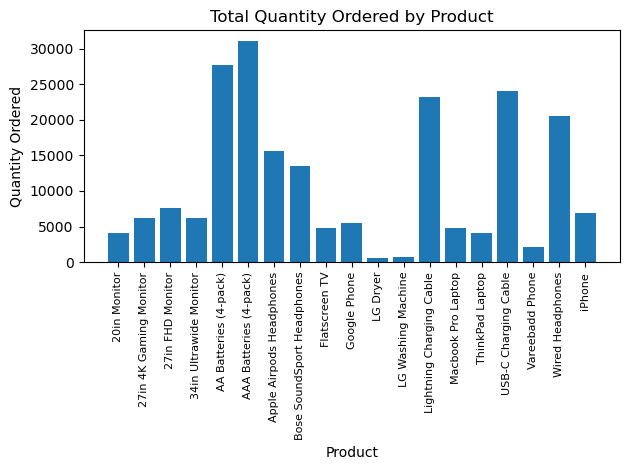

In [89]:
product_group = all_data.groupby('Product')['Quantity Ordered'].sum()

keys = [key for key, value in product_group.items()]
quantity_ordered = [value for key, value in product_group.items()]

plt.bar(keys, quantity_ordered)
plt.xticks(rotation='vertical', fontsize=8)
plt.ylabel("Quantity Ordered")
plt.xlabel("Product")
plt.title("Total Quantity Ordered by Product")
plt.tight_layout()
plt.show()


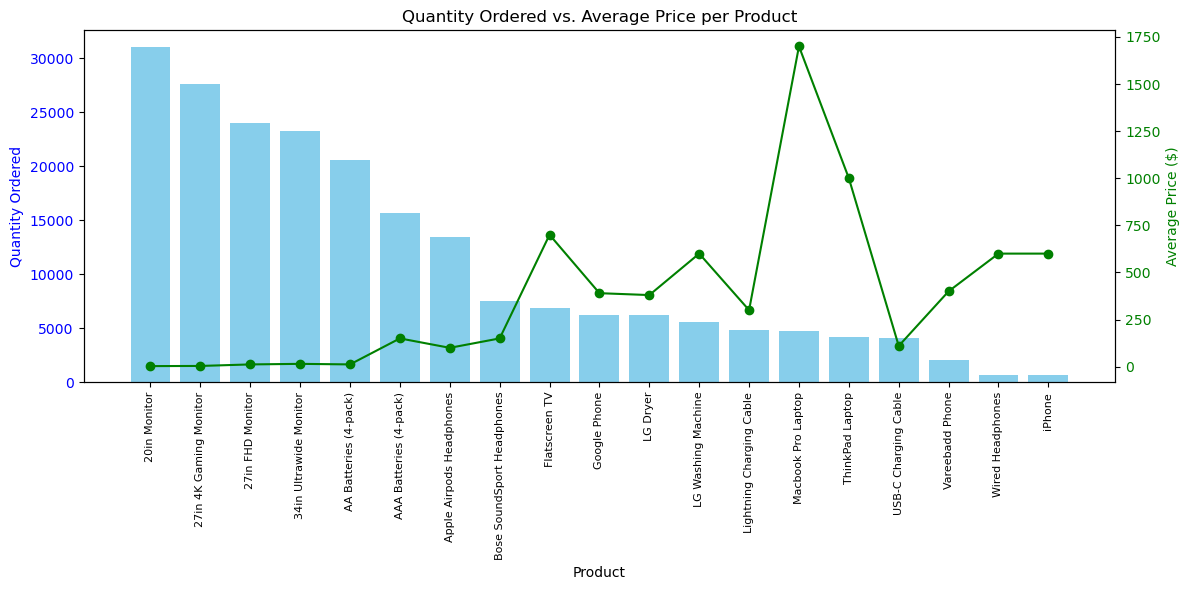

In [93]:


# Step 1: Group and aggregate data
product_group = all_data.groupby('Product')
quantity_ordered = product_group['Quantity Ordered'].sum()
prices = product_group['Price Each'].mean()

# Step 2: Sort based on quantity for better visualization
products = quantity_ordered.index
sorted_idx = quantity_ordered.sort_values(ascending=False).index

# Step 3: Reorder both series
quantity_ordered = quantity_ordered.loc[sorted_idx]
prices = prices.loc[sorted_idx]

# Step 4: Create figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for quantity
ax1.bar(products, quantity_ordered, color='skyblue', label='Quantity Ordered')
ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticklabels(products, rotation='vertical', fontsize=8)

# Line chart for average price
ax2 = ax1.twinx()
ax2.plot(products, prices, color='green', marker='o', label='Average Price')
ax2.set_ylabel('Average Price ($)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Title and layout
plt.title('Quantity Ordered vs. Average Price per Product')
fig.tight_layout()
plt.show()
